# Phase 3 Code Challenge Review

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
import graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


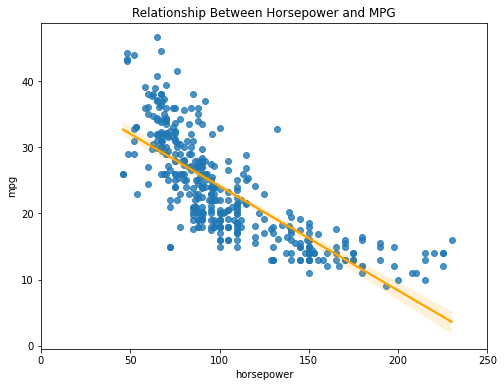

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

* Cost function - RSS (Residual Sum of Squares)
* Slope
* Gradient descent = optimization
* Minimizing RSS by finding the optimal slope
* m = -0.158

### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

Tangent lines along the curve, where the slope is zero

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

Change of the coefficient. 

Learning rate determines how large the steps are to start

## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

* Binary, categorical targets
* Log-odds which are translated into probabilities
* Linear predicts continuous targets, evaluation criteria is different, how we interpret the coefficients is different, sigmoid function vs line, one is classification and the other is regression
* Parametric - has coefficients (parameters)

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

Benefit: can handle large data, less prone to overfitting than KNN or decision trees  


Why another model may be better: decision tree will give you feature importance (more inferential), decision trees don't care about multicollinearity, less training (lazy learning) 

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [15]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns='target', axis=1)
y = mpg_class['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Scale the data
ss = StandardScaler()

#ss.fit(X_train)
#X_train_scaled = ss.transform(X_train)

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [17]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

Predicting only our majority class, 0

#### Part 3: How accurate would that baseline be on test data?


In [19]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:
75% accurate

### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

Target is imbalanced, could use SMOTE to oversample the 1 class, or can undersample the 0 class. 

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [20]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

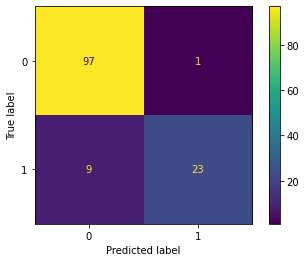

In [21]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [22]:
TP = 23
FP = 1
TN = 97
FN = 9

In [24]:
# Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9230769230769231

In [30]:
# Precision
precision = TP /(TP +FP)
precision

0.9583333333333334

In [31]:
# Recall
recall = TP / (TP +FN )
recall

0.71875

In [32]:
# F1-Score
f1score = 2 *((precision * recall)/ (precision + recall))
f1score

0.8214285714285714

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [35]:
# Calculate roc-auc
y_hat = logreg.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test, y_hat)

0.9811862244897959

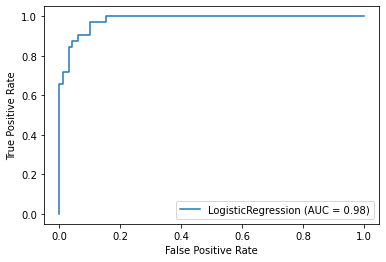

In [36]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

Pretty well - precision is better than recall, TPR higher than FPR

## Part 4: Decision Trees

### Set Up

In [37]:
# Helper function
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

In [38]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

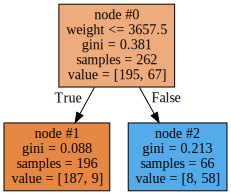

In [39]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, ['weight'])

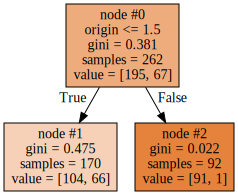

In [40]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, ['origin'])

### 13) Which of these trees does a better job splitting the data? How can you tell?

First one because the sum of the ginis is lower and lower is better! Pure nodes. We want both nodes to be as pure as possible.

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [41]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

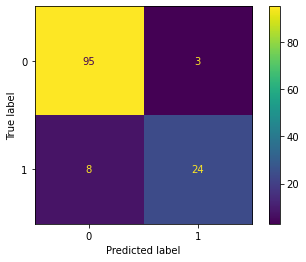

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test_scaled, y_test)
plt.show()

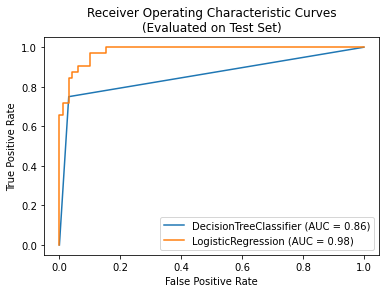

In [43]:
# Visualizing the ROCs for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

Logistic Regression has a higher AUC, more area under the curve, higher TPR, lower FPR